<a href="https://colab.research.google.com/github/Taylor-X01/Optimization-Algorithms/blob/main_project/Backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

dx = 1e-6

In [15]:
def phi(alpha):
    return (alpha ** 3) + 3 * (alpha ** 2) - 1

x = np.linspace(-1, 1, 1000)
y = phi(x)

In [11]:
def armijo(phi, m=0.2, alpha_0=1):
    alpha = alpha_0
    
    while phi(alpha) <= phi(0) + m * alpha * derivative(phi, 0, dx=dx):
        alpha = 2 * alpha

    while phi(alpha) > phi(0) + m * alpha * derivative(phi, 0, dx=dx):
        alpha = alpha / 2

    return alpha

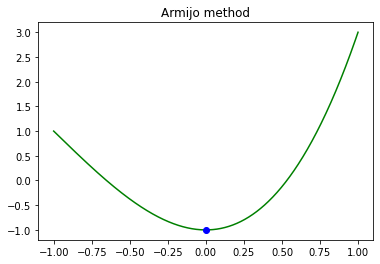

In [16]:
plt.title('Armijo method')
x_sol = armijo(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

In [13]:
def goldstein(phi, m=0.2, alpha_0=1, t=2):
    alpha = alpha_0
    a = 0
    b = np.inf

    while True:
        if phi(alpha) <= phi(0) + m * alpha * derivative(phi, 0, dx=dx):
            if phi(alpha) >= phi(0) + (1 - m) * alpha * derivative(phi, 0, dx=dx):
                return alpha
            a = alpha 
            if b < np.inf:
                alpha = (a + b) / 2
            else:
                alpha = t * alpha
        else:
            b = alpha
            alpha = (a + b) / 2

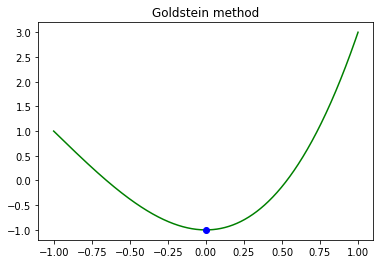

In [17]:
plt.title('Goldstein method')
x_sol = goldstein(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

In [ ]:
def wolfe(phi, m=0.2, alpha_0=1)